# Clustering and dimensionality reduction (15 marks)

## Task 4

In [1]:
# Import Libraries
import os
import pandas as pd  # use pandas to load data from CSV files
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Loading data
data_path = "breast_cancer_wisconsin_diagnostic"

files = os.listdir(data_path)
print(files)

['wdbc.data', 'wdbc.names']


In [3]:
# Loading data

feature_names = ["Feature{}".format(i) for i in range(1, 31)]
names = ["ID", "Diagnosis"] + feature_names
names
df = pd.read_csv(os.path.join(data_path, 'wdbc.data'), header=None, names=names)

In [4]:
# print(df.shape) # (569, 32)

In [5]:
# PCA functions

def sort_evals_descending(evals, evectors):
    index = np.flip(np.argsort(evals))
    evals = evals[index]
    evectors = evectors[:, index]
    if evals.shape[0] == 2:
        if np.arccos(np.matmul(evectors[:, 0], 1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
            evectors[:, 0] = -evectors[:, 0]
        if np.arccos(np.matmul(evectors[:, 1], 1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
            evectors[:, 1] = -evectors[:, 1]
    return evals, evectors


def pca(X):
    X_bar = X - np.mean(X, axis=0)
    cov_matrix = 1 / X.shape[0] * np.matmul(X_bar.T, X_bar)
    evals, evectors = np.linalg.eigh(cov_matrix)
    evals, evectors = sort_evals_descending(evals, evectors)
    score = np.matmul(X, evectors)
    return score, evectors, evals

In [6]:
# Convert data to useable format
dataset = df.to_numpy()
input_features = dataset[:, -30:]
input_features = input_features.astype(np.float32)

# Running PCA on input_features
score, evectors, evals = pca(input_features)

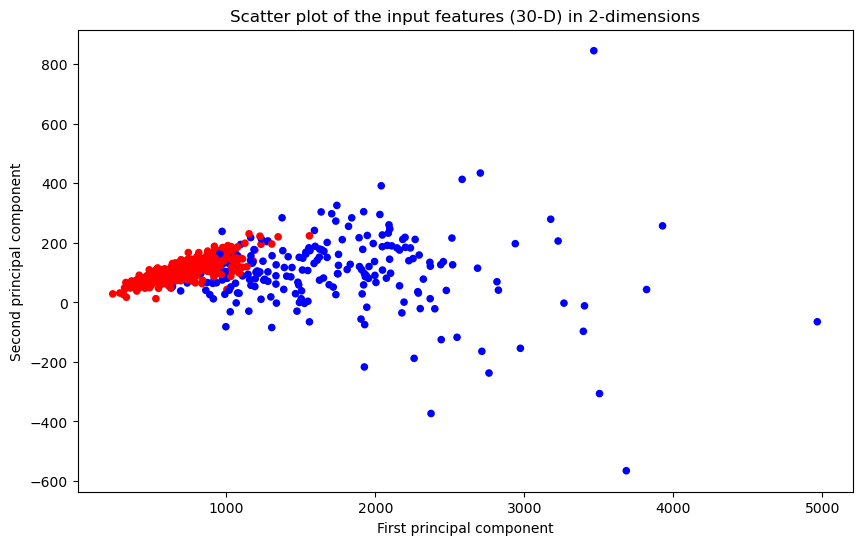

In [7]:
# Plotting the graph
colors = {'M': 'blue', 'B': 'red'}

scores_pc2 = score[:,:2]
plt.figure(figsize=(10,6))
plt.scatter(scores_pc2[:, 0], scores_pc2[:, 1], c=df['Diagnosis'].map(colors), s=20, alpha=1)

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("Scatter plot of the input features (30-D) in 2-dimensions")
plt.show()

In [8]:
# Perform PCA using sklearn.decomposition.PCA
pca = PCA(n_components=5)
new_input_features = pca.fit_transform(input_features)

var_ratio = pca.explained_variance_ratio_
var_ratio_cumulative = [sum(var_ratio[:i + 1]) for i in range(len(var_ratio))]

print("Percentage of variance explained by PC1:", var_ratio[0])
print("Percentage of variance explained by PC2:", var_ratio[1])
print("Cumulative percentage of variance explained by PC1 and PC2", var_ratio_cumulative[1])

Percentage of variance explained by PC1: 0.9820447
Percentage of variance explained by PC2: 0.016176494
Cumulative percentage of variance explained by PC1 and PC2 0.9982211906462908


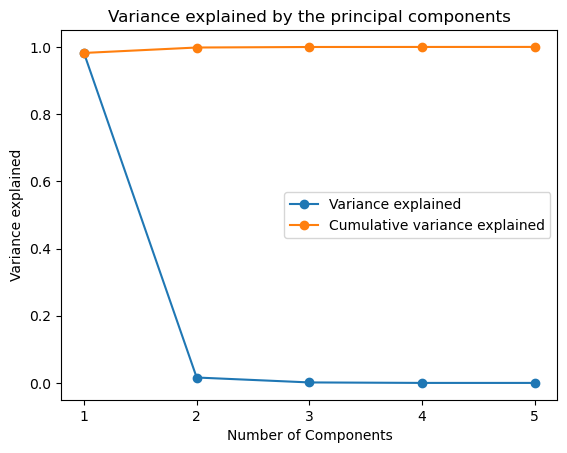

In [9]:
# Plotting graph of variance explained by the principal components
temp = np.arange(1,6,1)

x_values = range(len(temp))
plt.plot(x_values, var_ratio, label="Variance explained", marker="o")
plt.plot(x_values, var_ratio_cumulative, label="Cumulative variance explained", marker="o")

plt.xticks(x_values, temp)
plt.xlabel("Number of Components")
plt.ylabel("Variance explained")
plt.title("Variance explained by the principal components")
plt.legend(loc="best")
plt.show()

## Task 5

In [10]:
# Import Libraries
from matplotlib.colors import ListedColormap
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score

In [11]:
# Train a GMM

gmm = GaussianMixture(n_components=2).fit(scores_pc2)
probabilities = gmm.predict_proba(scores_pc2)
# print(probabilities)

pred = gmm.predict(scores_pc2)
true_labels = df['Diagnosis'].to_numpy()
binary_true_labels = [1 if label == 'M' else 0 for label in true_labels]
# print(pred)
# print(true_labels)
# print(binary_true_labels)
print ("Accuracy score:", accuracy_score(pred, binary_true_labels))

Accuracy score: 0.9332161687170475


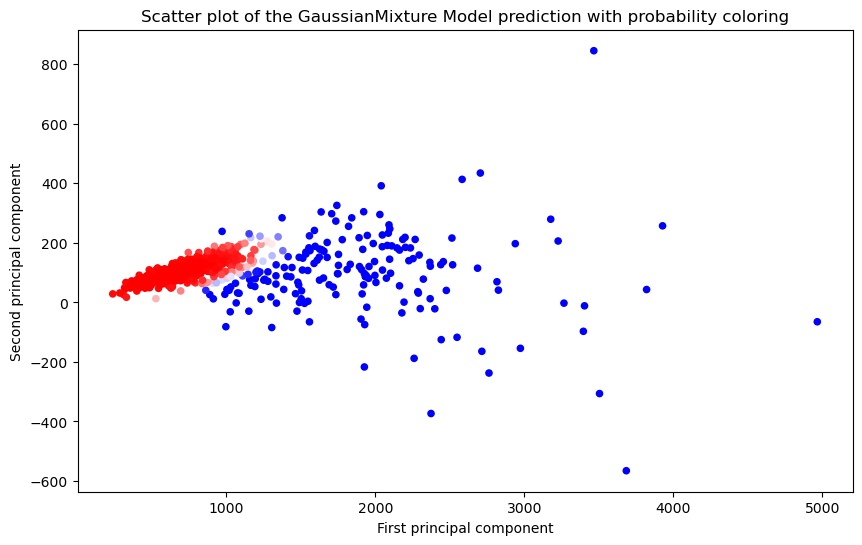

In [12]:
from matplotlib.colors import LinearSegmentedColormap
# Define the new color map
red = [1, 0, 0]  # Bright red
blue = [0, 0, 1]  # Bright blue

colors = [blue, (1, 1, 1), red]  # Include white for a smoother transition
n_bins = 100  # Number of bins in the colormap
cmap_name = "bright_blue_to_red"
bright_blue_to_red = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

colors = probabilities[:, 0]

# Plot the scatter graph
plt.figure(figsize=(10, 6))
# or can use cmap = 'coolwarm'
plt.scatter(scores_pc2[:, 0], scores_pc2[:, 1], c=colors, cmap=bright_blue_to_red, s=20, alpha=1)

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("Scatter plot of the GaussianMixture Model prediction with probability coloring")
plt.show()